In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
                                                                                                                                                                                                                                                                                               
# 
#     ,o888888o.    8 8888      88  8 8888 8 888888888o.      8 8888888888   8 888888888o.      
#    8888     `88.  8 8888      88  8 8888 8 8888    `^888.   8 8888         8 8888    `^888.   
# ,8 8888       `8. 8 8888      88  8 8888 8 8888        `88. 8 8888         8 8888        `88. 
# 88 8888           8 8888      88  8 8888 8 8888         `88 8 8888         8 8888         `88 
# 88 8888           8 8888      88  8 8888 8 8888          88 8 888888888888 8 8888          88 
# 88 8888           8 8888      88  8 8888 8 8888          88 8 8888         8 8888          88 
# 88 8888   8888888 8 8888      88  8 8888 8 8888         ,88 8 8888         8 8888         ,88 
# `8 8888       .8' ` 8888     ,8P  8 8888 8 8888        ,88' 8 8888         8 8888        ,88' 
#    8888     ,88'    8888   ,d8P   8 8888 8 8888    ,o88P'   8 8888         8 8888    ,o88P'   
#     `8888888P'       `Y88888P'    8 8888 8 888888888P'      8 888888888888 8 888888888P'      
#
#                                                                        P R O O F R E A D I N G
# http://github.com/VCG/guidedproofreading
#

import gp

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
#
# LOAD GP MODEL
#
g = gp.GP() # model='mouse' by default, model='fruitfly'...

Loaded GP model for mouse brain.


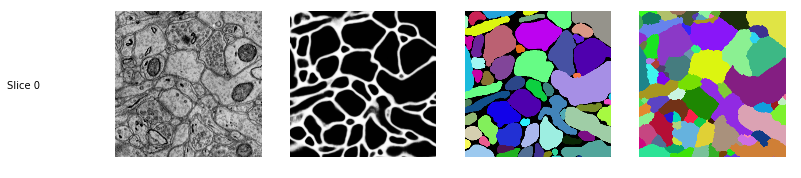

In [38]:
#
# LOAD TEST DATA (AC4 Subvolume 400x400x10vx)
#
# Haehn D, Knowles-Barley S, Roberts M, Beyer J, Kasthuri N, Lichtman JW, Pfister H. 
# Design and Evaluation of Interactive Proofreading Tools for Connectomics.
# IEEE Transactions on Visualization and Computer Graphics 2014;20(12):2466-2475.
#
#
image, prob, gold, segmentation = gp.Util.load(0) # <-- slice 0 only, we will load all later..
gp.Util.show(image, prob, gold, segmentation)

0.991059184074


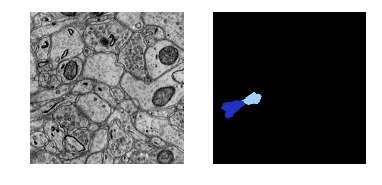

In [42]:
#
# RANK SEGMENT PAIR FOR SPLIT ERROR
#
label1 = 2365
label2 = 975

# Show the pair
gp.Util.show_labels(image, segmentation, [label1, label2])

# Rank the pair
#   0: correct split
#   ..
#   1: split error
rank = g.rank(image, prob, segmentation, label1, label2)
print rank

0.999999998746


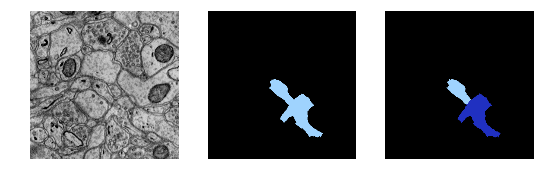

In [43]:
#
# FIND MERGE ERROR IN SEGMENT 
#
label1 = 583

# Generate potential boundaries in a segment and rank them.
#   result: the fixed merge error
#   rank:
#     0: uncertain fix
#     ..
#     1: confident fix
result, rank = g.find_merge_error(image, prob, segmentation, label1)
print rank

# Show the label and the fix
gp.Util.show_labels(image, segmentation, [label1], result)

In [ ]:
#
#
#
# CORRECT A WHOLE VOLUME
#
#
#

Loading..
100%

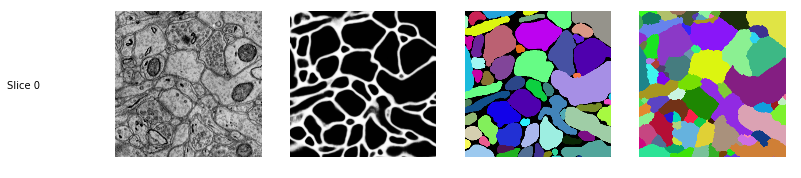

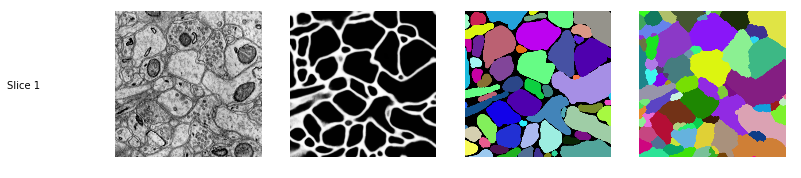

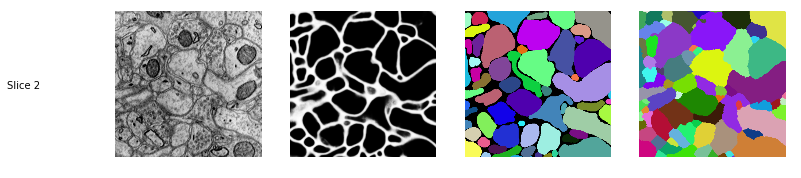

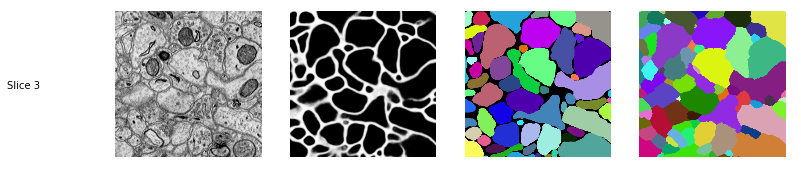

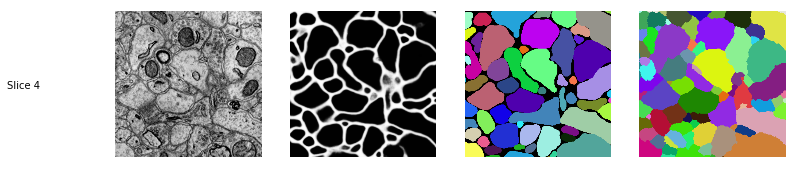

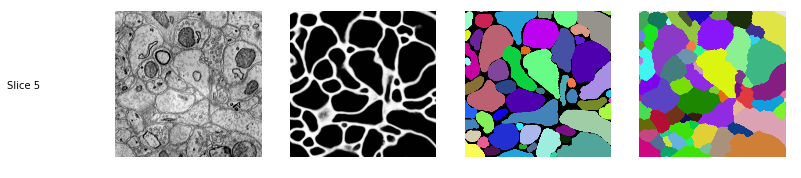

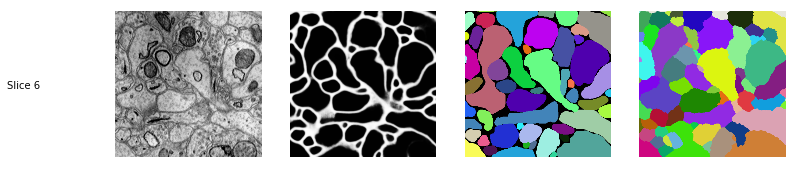

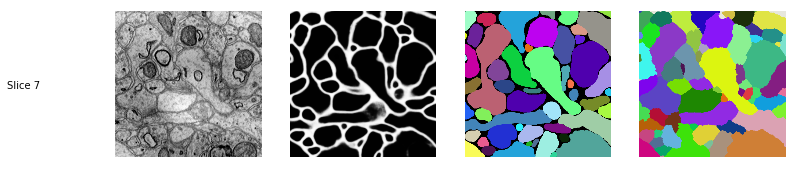

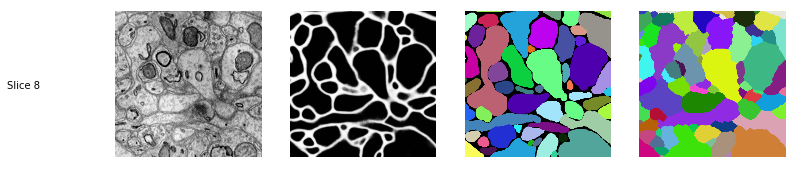

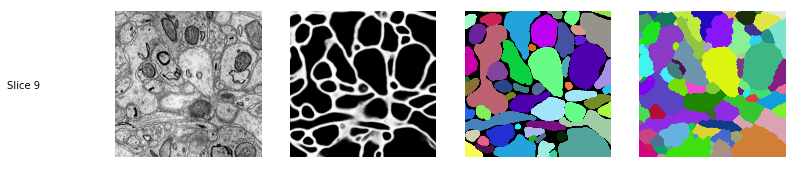

In [47]:
#
# LOAD TEST DATA
#
images, probs, golds, segmentations = gp.Util.load_all() # <-- this time we load all 10 slices
gp.Util.show(images, probs, golds, segmentations)

In [ ]:
#
# TODO!
#